# 1. Data Cleaning

We saved the original data as df_data_1. This dataset contains 37 attributes.

In [2]:
df_data_1.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


We retrieve SEVERITYCODE, ADDRTYPE, JUNCTIONTYPE, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT and SPEEDING from the original data.

In [3]:
df_1 = df_data_1.loc[:,["SEVERITYCODE","ADDRTYPE","INCDTTM","JUNCTIONTYPE","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","PEDROWNOTGRNT","SPEEDING"]]

We remove the cases by human factors from df_1 because we would like to find out the relation between the severity in collision and the surrounding conditions. For example, we leave the cases that "inattentionind" is not equal to "Y". 

In [4]:
df_2 = df_1[(df_1["INATTENTIONIND"] != "Y") & (df_1["UNDERINFL"] != "Y") & (df_1["UNDERINFL"] != "1") & (df_1["PEDROWNOTGRNT"] != "Y") & (df_1["SPEEDING"] != "Y") ]

We will show more detail. In df_1 dataset, No.22 collision is caused by inattention. This is a human factor and we want to drop such cases.

In [28]:
df_1.head(25)

,SEVERITYCODE,ADDRTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,Block,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Block,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,Block,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,Intersection,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN
5,1,Intersection,4/20/2019 5:42:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,NaN
6,1,Intersection,12/9/2008,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN
7,2,Intersection,4/15/2020 5:47:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,NaN
8,1,Block,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),NaN,0,Clear,Dry,Daylight,NaN,NaN
9,2,Intersection,3/20/2006 3:49:00 PM,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN,NaN


In df_2 dataset, we removed collisions caused by human factors.

In [29]:
df_2.head(25)

,SEVERITYCODE,ADDRTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,Block,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Block,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,Block,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,Intersection,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN
5,1,Intersection,4/20/2019 5:42:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,NaN
6,1,Intersection,12/9/2008,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN
7,2,Intersection,4/15/2020 5:47:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,NaN
8,1,Block,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),NaN,0,Clear,Dry,Daylight,NaN,NaN
9,2,Intersection,3/20/2006 3:49:00 PM,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN,NaN


We choose SEVERITYCODE as a dependent variable. As independent variables, we select surrounding conditions, ADDRTYPE, JUNCTIONTYPE, WEATHER, ROADCOND and LIGHTCOND.

In [5]:
df_3 = df_2.loc[:,["SEVERITYCODE","ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]]
df_3.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Block,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Block,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Intersection,At Intersection (intersection related),Raining,Wet,Daylight


In df_3 dataset, there are NaN data. Here drop NaN data to improve the accuracy.

In [6]:
df_4 = df_3.dropna(how='any')

Also drop "Unknown" and "Other" cases from df_4.

In [7]:
df_5 = df_4[(df_4["JUNCTIONTYPE"]  != "Unknown") & (df_4["WEATHER"]  != "Unknown") & (df_4["WEATHER"]  != "Other") & (df_4["ROADCOND"]  != "Unknown") & (df_4["ROADCOND"]  != "Other") & (df_4["ROADCOND"]  != "Oil") & (df_4["LIGHTCOND"]  != "Unknown") & (df_4["LIGHTCOND"]  != "Other") & (df_4["LIGHTCOND"]  != "Dark - Unknown Lighting")]

120058 cases are left in dataset.

In [8]:
df_5.shape

(120058, 6)

# 2. Overview of Data

Before machine learning, we will draw bar graphs about relations between severity and independent variables. At first, we need to import matplotlib.

In [16]:
import matplotlib.style
import matplotlib.pyplot as plt

matplotlib.style.use("ggplot")

To get the counts of unique values for each feature, we execute ".value_counts()".

In [17]:
df_5["SEVERITYCODE"].value_counts()

1    84200
2    35858
Name: SEVERITYCODE, dtype: int64

In [18]:
df_5["ADDRTYPE"].value_counts()

Block           72804
Intersection    47121
Alley             133
Name: ADDRTYPE, dtype: int64

We draw a bar graph between "SEVERITYCODE" and "ADDRTYPE".

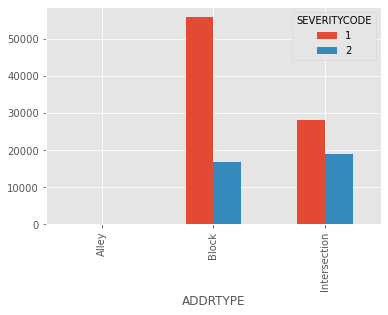

In [19]:
df_5.groupby("ADDRTYPE")["SEVERITYCODE"].value_counts().unstack().plot.bar()

In [20]:
df_5["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              51569
At Intersection (intersection related)               45919
Mid-Block (but intersection related)                 13514
Driveway Junction                                     7781
At Intersection (but not related to intersection)     1181
Ramp Junction                                           94
Name: JUNCTIONTYPE, dtype: int64

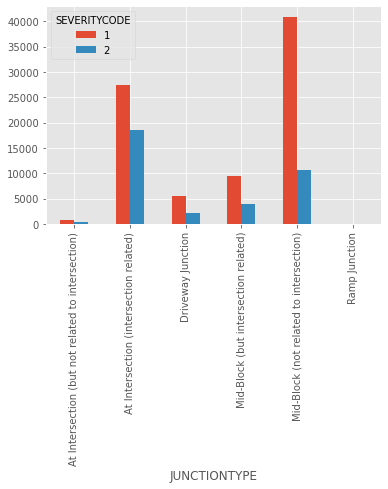

In [21]:
df_5.groupby("JUNCTIONTYPE")["SEVERITYCODE"].value_counts().unstack().plot.bar()

In [22]:
df_5["WEATHER"].value_counts()

Clear                       77728
Raining                     22282
Overcast                    19008
Snowing                       556
Fog/Smog/Smoke                352
Sleet/Hail/Freezing Rain       74
Blowing Sand/Dirt              33
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64

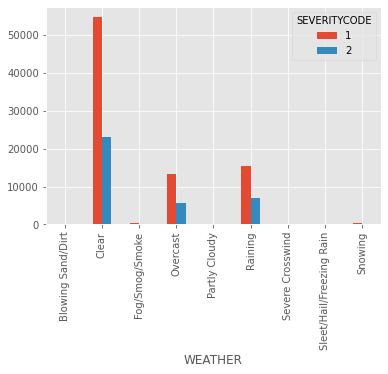

In [23]:
df_5.groupby("WEATHER")["SEVERITYCODE"].value_counts().unstack().plot.bar()

In [24]:
df_5["ROADCOND"].value_counts()

Dry               87059
Wet               31729
Ice                 644
Snow/Slush          537
Standing Water       49
Sand/Mud/Dirt        40
Name: ROADCOND, dtype: int64

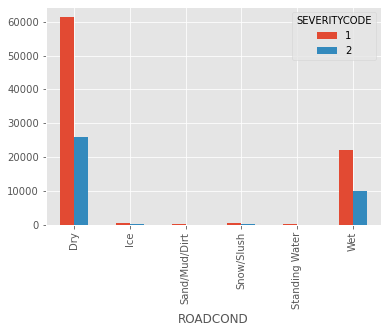

In [25]:
df_5.groupby("ROADCOND")["SEVERITYCODE"].value_counts().unstack().plot.bar()

In [26]:
df_5["LIGHTCOND"].value_counts()

Daylight                    82215
Dark - Street Lights On     30412
Dusk                         4131
Dawn                         1657
Dark - No Street Lights       938
Dark - Street Lights Off      705
Name: LIGHTCOND, dtype: int64

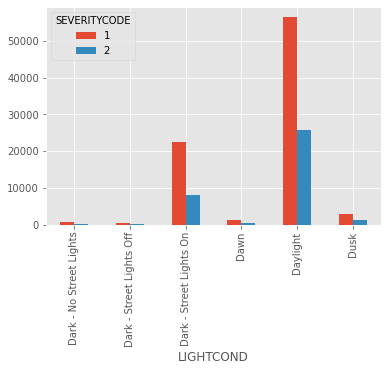

In [27]:
df_5.groupby("LIGHTCOND")["SEVERITYCODE"].value_counts().unstack().plot.bar()

# 3. Model Building

We would like to find out what conditions cause “severity2” cases. In order to analyze our data we employed Decision Tree and Random Forest which are the supervised learning methods. Random Forest is an ensemble of decision trees. The reason why we choose these methods is that it is easy for us to understand what surrounding conditions cause more severe collisions by visualization of tree.  
  
Before machine learning, we need to convert categorical variables into indicator variables with pandas.get_dummies().

In [30]:
df_dummy = pd.get_dummies(df_5[["ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]])
df_dummy.head()

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,WEATHER_Blowing Sand/Dirt,...,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Additionally, we transforme severity2 to “1” and severity1 to “0”.

In [31]:
df_dummy["SEVERITY"] = df_5["SEVERITYCODE"].map(lambda x: 1 if x == 2 else 0)

Split data into train data and test data. We construct four models, Decision Tree without and with balanced and Random Forest without and with balanced.

In [33]:
from sklearn.model_selection import train_test_split

X = df_dummy.drop("SEVERITY", axis = 1)
y = df_dummy["SEVERITY"]

X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split( X, y, test_size=0.2, random_state=4)

## Model1 : Decision Tree without balanced

Decision Tree model has parameters which we can designate. We chose entropy as “criterion” to measure the impurity. The maximum depth is determined by grid search with cross-validation which optimizes the maximum depth. In this report, we change the maximum depth from 2  to 11.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

drugTree = DecisionTreeClassifier(criterion="entropy")

param_grid = {'max_depth' : range(2,11)}

cv =GridSearchCV(drugTree, param_grid = param_grid, cv =10)
cv.fit(X_trainDT,y_trainDT)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(2, 11)})

Confirm the best parameter.

In [35]:
cv.best_params_

{'max_depth': 2}

Now that we know the best parameter is 2, we set max_depth=2.

In [36]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
drugTree.fit(X_trainDT,y_trainDT)

y_predDT = drugTree.predict(X_testDT)

print("accuracy(train) : {:.3f}" .format(drugTree.score(X_trainDT, y_trainDT)))
print("accuracy(test) : {:.3f}" .format(drugTree.score(X_testDT, y_testDT)))

accuracy(train) : 0.701
accuracy(test) : 0.704


Calculate precision, recall and f1-score for model 1.

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_testDT, y_predDT))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83     16915
           1       0.00      0.00      0.00      7097

    accuracy                           0.70     24012
   macro avg       0.35      0.50      0.41     24012
weighted avg       0.50      0.70      0.58     24012



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the results of precision, recall, f1-score of Severity 2, this model is not considered good.

## Model2 : Deceision Tree with balanced

In general, we should make a balanced dataset when the classes are not equally distributed. In Decision Tree, we can realize a balanced dataset by designating the parameter, “class_weight”.

In [39]:
drugTree = DecisionTreeClassifier(class_weight='balanced', criterion="entropy")

param_grid = {'max_depth' : range(2,11)}

cv =GridSearchCV(drugTree, param_grid = param_grid, cv =10)
cv.fit(X_trainDT,y_trainDT)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': range(2, 11)})

Again check the best parameter and use this value.

In [41]:
cv.best_params_

{'max_depth': 2}

In [42]:
drugTree = DecisionTreeClassifier(class_weight='balanced', criterion="entropy", max_depth = 2)
drugTree.fit(X_trainDT,y_trainDT)

y_predDT = drugTree.predict(X_testDT)

print("accuracy(train) : {:.3f}" .format(drugTree.score(X_trainDT, y_trainDT)))
print("accuracy(test) : {:.3f}" .format(drugTree.score(X_testDT, y_testDT)))

accuracy(train) : 0.627
accuracy(test) : 0.631


In [43]:
print(classification_report(y_testDT, y_predDT))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72     16915
           1       0.40      0.52      0.45      7097

    accuracy                           0.63     24012
   macro avg       0.59      0.60      0.59     24012
weighted avg       0.66      0.63      0.64     24012



This model is better than the former one. Let’s interpret the result of the Decision Tree model with balanced by visualization of tree.

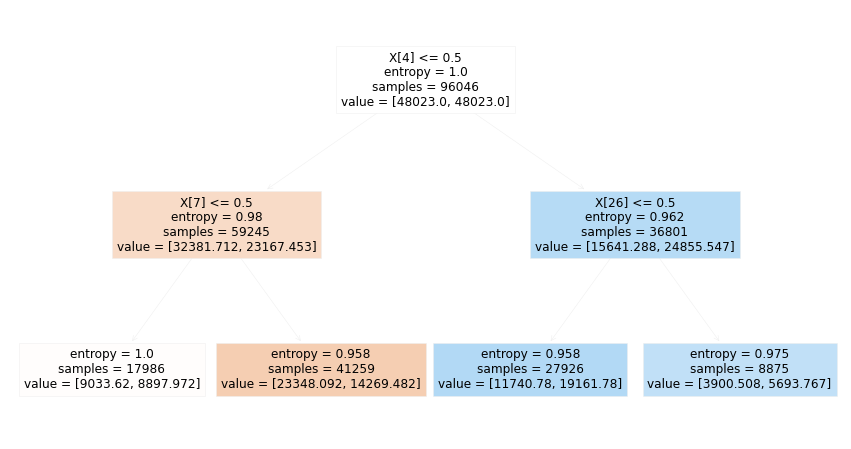

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot()
plot_tree(drugTree, filled=True);

X[4], X[7], and X[26] mean “At Intersection (intersection related)”, “At Intersection (but not related to intersection)” and “Dusk” respectively. The left side of the value is the number of severity1 collision and the right side is that of severity2 collision. Note that convert categorical variables into indicator variables. For example, “X[4]<=0.5 is True” means the collision not “At Intersection (intersection related)” and “X[4]<=0.5 is False” shows the collision “At Intersection (intersection related)”. From the first step of the tree, we can decrease the entropy. In addition, we can obtain more severity2 collision samples when “X[4]<=0.5 is False”. Therefore, we understand that “At Intersection (intersection related)” is important factor. At the second step, it is difficult to distinguish severity1 and severity2 case by the surrounding factors because the entropies increase.

## Model3 : Random Forest without balanced

In [45]:
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split( X, y, test_size=0.2, random_state=4)

In Random Forest, we use 2 as the maximum depth because grid search in Decision Tree showed that the best depth was 2. “Criterion” is set to entropy. We set 50 as “n_estimators” which means the number of created decision trees.

In [46]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, n_estimators=50, criterion="entropy",random_state=4)
random_forest.fit(X_trainRF, y_trainRF)

y_predRF = random_forest.predict(X_testRF)

trainaccuracy_random_forest = random_forest.score(X_trainRF, y_trainRF)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

TrainAccuracy: 0.7005497365845532


Calculate precision, recall and f1-score for model 3.

In [47]:
print(classification_report(y_testRF, y_predRF))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83     16915
           1       0.00      0.00      0.00      7097

    accuracy                           0.70     24012
   macro avg       0.35      0.50      0.41     24012
weighted avg       0.50      0.70      0.58     24012



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the results of precision, recall, f1-score of Severity 2, this model is not considered good like model 1.

## Model4 : Random Forest with balanced

 As we did in Decision Tree, we try balanced dataset. In Random Forest, we can realise this by setting class_weight='balanced_subsample'.

In [48]:
random_forest = RandomForestClassifier(class_weight='balanced_subsample', max_depth=2, n_estimators=50,criterion="entropy", random_state=4)
random_forest.fit(X_trainRF, y_trainRF)

y_predRF = random_forest.predict(X_testRF)

trainaccuracy_random_forest = random_forest.score(X_trainRF, y_trainRF)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

TrainAccuracy: 0.6232950877704433


In [49]:
print(classification_report(y_testRF, y_predRF))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72     16915
           1       0.40      0.53      0.46      7097

    accuracy                           0.63     24012
   macro avg       0.59      0.60      0.59     24012
weighted avg       0.66      0.63      0.64     24012



This is the almost same result as model 2. Although we can visualize trees like Decisin Tree, we will omit here because there appear 50 trees. Instead we confirm the influence of each feature.

In [50]:
importance = pd.DataFrame({ "Variable":X_trainRF.columns, "Importance" :random_forest.feature_importances_})
importance

,Variable,Importance
0,ADDRTYPE_Alley,0.000138
1,ADDRTYPE_Block,0.263467
2,ADDRTYPE_Intersection,0.197743
3,JUNCTIONTYPE_At Intersection (but not related ...,0.000394
4,JUNCTIONTYPE_At Intersection (intersection rel...,0.121970
5,JUNCTIONTYPE_Driveway Junction,0.006227
6,JUNCTIONTYPE_Mid-Block (but intersection related),0.008598
7,JUNCTIONTYPE_Mid-Block (not related to interse...,0.269645
8,JUNCTIONTYPE_Ramp Junction,0.000000
9,WEATHER_Blowing Sand/Dirt,0.000000


The larger the rate of “Importance” is, the more important the feature is to make a classification model. This result shows that JUNKCTIONTYPE_At intersection(intersection related) is more important. This is consistent with the model 2 result.